<a href="https://colab.research.google.com/github/youyou2425/machine-learning-projects/blob/main/heart_attack_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downgrade sklearn to be compatible with SGBoost

In [ ]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import data**

In [ ]:
#download dataset
! kaggle datasets download -d iamsouravbanerjee/heart-attack-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset
License(s): other
  0% 0.00/519k [00:00<?, ?B/s]
100% 519k/519k [00:00<00:00, 32.6MB/s]


In [ ]:
#unzip file
! unzip /content/heart-attack-prediction-dataset.zip

Archive:  /content/heart-attack-prediction-dataset.zip
  inflating: heart_attack_prediction_dataset.csv  


In [ ]:
#load data on dataframe
df = pd.read_csv('/content/heart_attack_prediction_dataset.csv')

In [ ]:
# save file to Google Drive permenently, index=False prevent saving index
df.to_csv('/content/drive/My Drive/Colab Notebooks/heart_attack_prediction_dataset.csv', index=False)

In [ ]:
heartatt_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart_attack_prediction_dataset.csv')
heartatt_df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


**EDA**

In [ ]:
heartatt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
heartatt_df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


check min value of each column, make sure missing values are not entered as 0 (ex. age, heart rate shouldn't have min value of 0)

Total number of null values for each column

In [ ]:
heartatt_df.isnull().sum()

,0
Patient ID,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0


No missing values, if need to impute missing values, use:  
from sklearn.impute import IterativeImputer  
imputer1 = IterativeImputer(max_iter=10, random_state=42)
imputer1.fit(df[['trestbps']])
df['trestbps'] = imputer1.transform(df[['trestbps']])
            or
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)

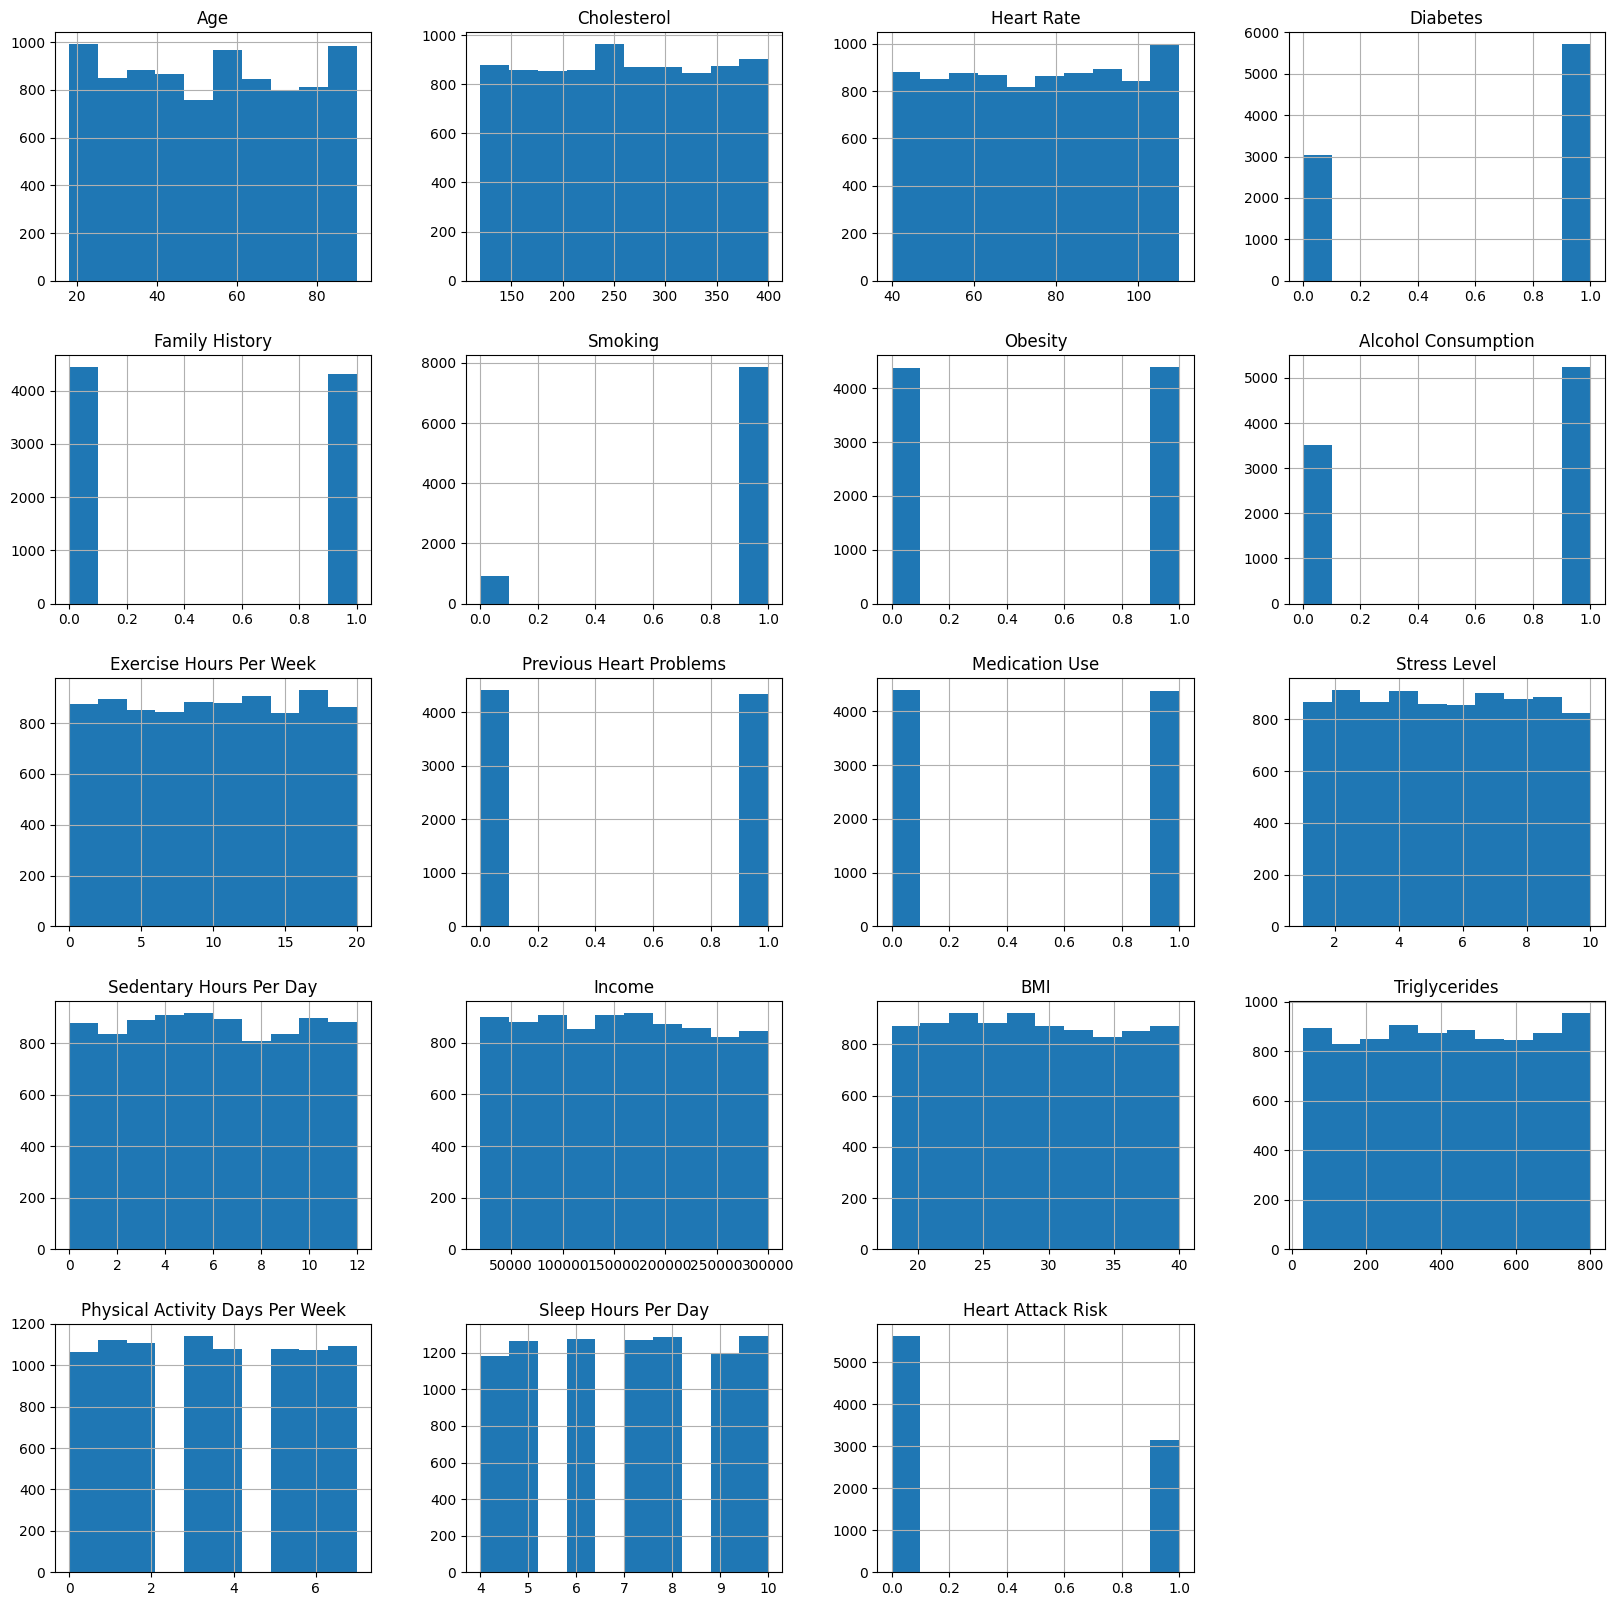

In [ ]:
p = heartatt_df.hist(figsize=(20, 20))

Check range of each column to see if there's any outliers. Physical activity and sleep hours can be treated as continuous variable

In [ ]:
# get frequencies of object columns
heartatt_df.drop(columns=['Patient ID'], inplace=True)
object_columns = heartatt_df.select_dtypes(include=['object']).columns
object_columns

Index(['Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere'], dtype='object')

In [ ]:
for column in object_columns:
    value_counts = heartatt_df[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for Sex:
Sex
Male      6111
Female    2652
Name: count, dtype: int64

Value counts for Blood Pressure:
Blood Pressure
146/94     8
101/93     8
106/64     7
102/104    7
176/77     7
          ..
155/102    1
154/71     1
178/90     1
98/85      1
119/67     1
Name: count, Length: 3915, dtype: int64

Value counts for Diet:
Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

Value counts for Country:
Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: count, dtype: int64

Value counts for Continent:
Continent
Asia             2543
Europe         

In [ ]:
#blood pressure is in high/low format, separate into 2 columns
heartatt_df[['Systolic', 'Diastolic']] = heartatt_df['Blood Pressure'].str.split('/', expand=True).astype(int)
heartatt_df.drop(columns=['Blood Pressure'], inplace=True)
heartatt_df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,28,Female,120,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,47,Male,250,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,36,Male,178,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


make sure the newly created columns don't have null values

In [ ]:
heartatt_df[['Systolic', 'Diastolic']].isnull().sum()

,0
Systolic,0
Diastolic,0


Convert object to numeric values

In [ ]:
object_columns = heartatt_df.select_dtypes(include=['object']).columns
object_columns

Index(['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# when creating new columns, need to ensure arrays converted to Series using pd.Series, and use df['column']
# LT_df.gender.values converts Series to arrays, which gets same result as LT_df.gender, i.e.fit_transform works on both arrays and Series
# index=med_df.index: This argument ensures that the new Series has the same index as
# the original DataFrame med_df
for column in object_columns:
    heartatt_df[column]=pd.Series(labelencoder.fit_transform(heartatt_df[column]), index=heartatt_df.index)
    value_counts = heartatt_df[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for Sex:
Sex
1    6111
0    2652
Name: count, dtype: int64

Value counts for Diet:
Diet
1    2960
0    2912
2    2891
Name: count, dtype: int64

Value counts for Country:
Country
7     477
0     471
2     462
17    457
1     449
12    448
6     446
3     440
4     436
11    435
10    433
9     431
15    430
5     429
16    428
13    425
19    425
18    420
8     412
14    409
Name: count, dtype: int64

Value counts for Continent:
Continent
1    2543
3    2241
5    1362
2     884
0     873
4     860
Name: count, dtype: int64

Value counts for Hemisphere:
Hemisphere
0    5660
1    3103
Name: count, dtype: int64



Check correlations before converting to dummy variables

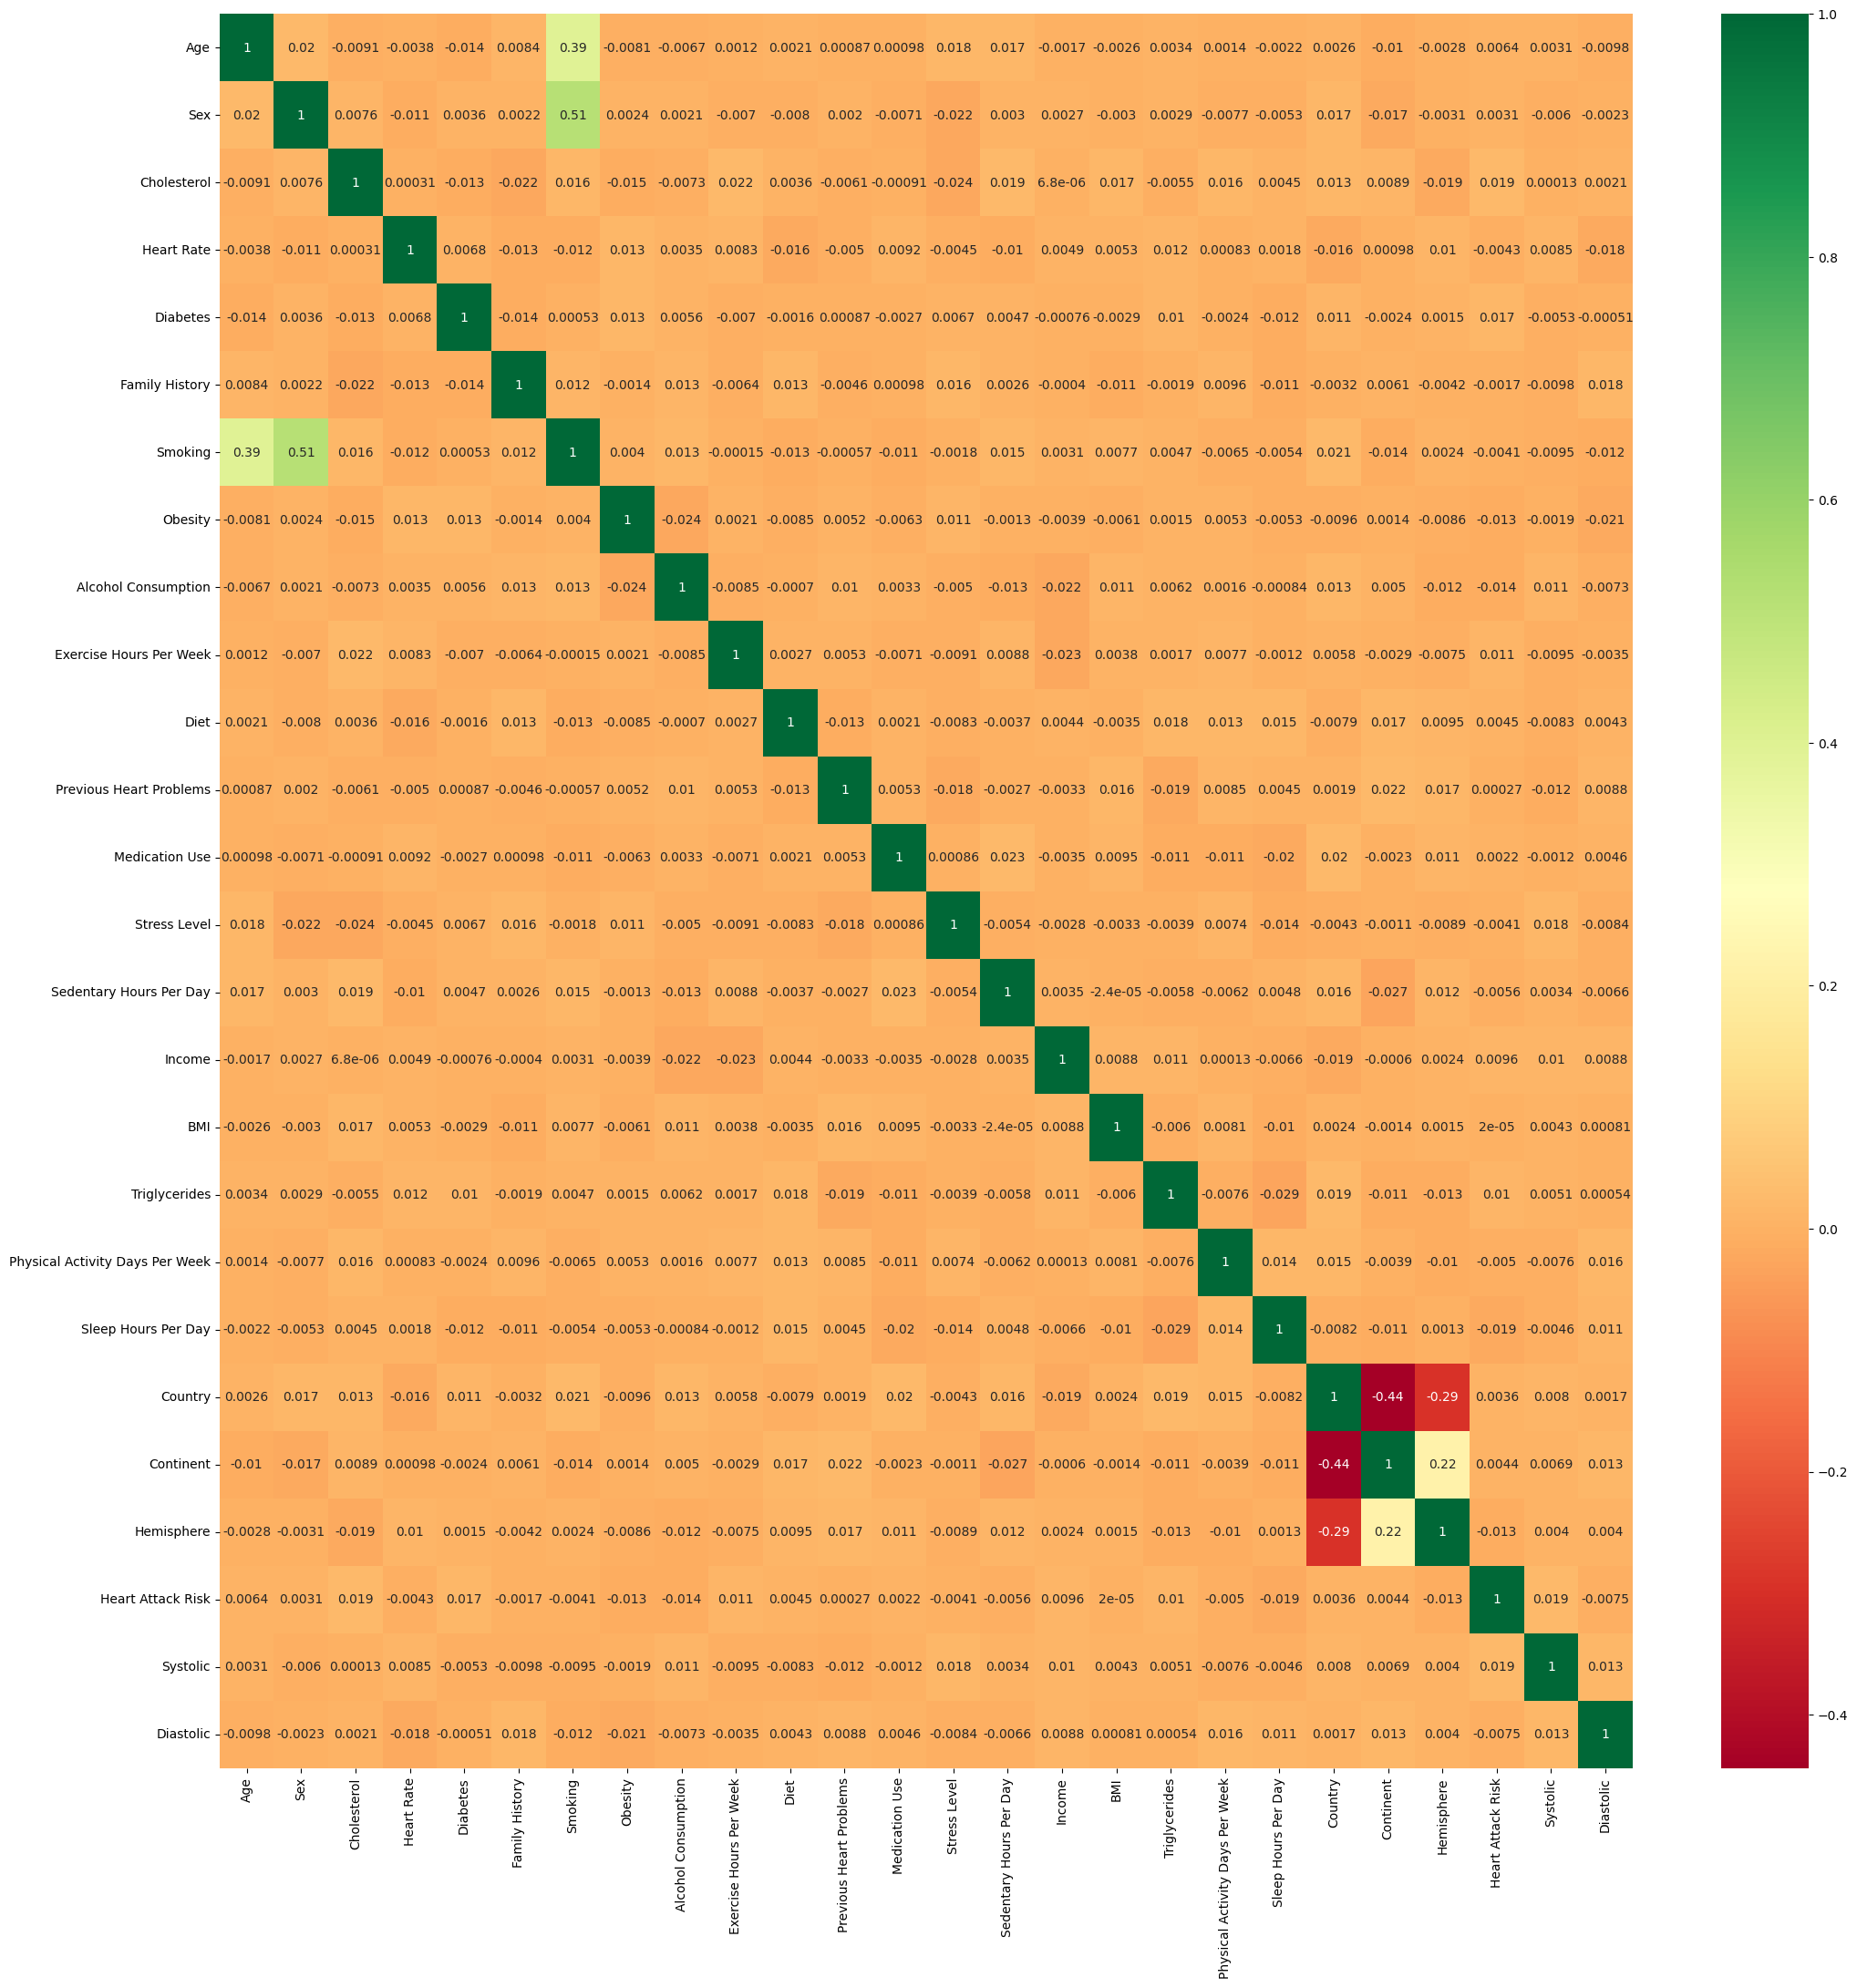

In [ ]:
plt.figure(figsize=(25, 25))
# Using seaborn to create a heatmap for the correlation matrix
p = sns.heatmap(heartatt_df.corr(), annot=True, cmap='RdYlGn')

Country and continent have correlation of 0.44, country and hemisphere have -0.29, continent and hemisphere 0.22; Smoking correlated with age (0.39) and sex (0.51)

In [ ]:
# using threshold of 0.55, no features are highly correlated
corr_matrix = heartatt_df.corr()
np.fill_diagonal(corr_matrix.values, 0)
high_corr_mask = np.abs(corr_matrix) > 0.55
high_corr_pairs = corr_matrix[high_corr_mask].stack().reset_index()
high_corr_pairs.columns = ['feature1', 'feature2', 'correlation']
high_corr_pairs

,feature1,feature2,correlation


Convert categorical variables with 3 or more levels to dummy variables, country has 16 values, can be treated as continuous variable

In [ ]:
#drop_first=True keep level-1 columns to give enough info, level of 0 dropped
Diet_dummies = pd.get_dummies(heartatt_df['Diet'], prefix='Diet', drop_first = True)
Continent_dummies = pd.get_dummies(heartatt_df['Continent'], prefix='Continent', drop_first = True)

#add the dummy variables back to the dataframe, create a new df to avoid rerunning
heartatt_df1 = pd.concat([heartatt_df, Diet_dummies, Continent_dummies], axis = 1)
heartatt_df1.drop(columns=['Diet', 'Continent'], inplace=True)
heartatt_df1

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Heart Attack Risk,Systolic,Diastolic,Diet_1,Diet_2,Continent_1,Continent_2,Continent_3,Continent_4,Continent_5
0,67,1,208,72,0,0,1,0,0,4.168189,...,0,158,88,False,False,False,False,False,False,True
1,21,1,389,98,1,1,1,1,1,1.813242,...,0,165,93,False,True,False,False,False,True,False
2,21,0,324,72,1,0,0,0,0,2.078353,...,0,174,99,True,False,False,False,True,False,False
3,84,1,383,73,1,1,1,0,1,9.828130,...,0,163,100,False,False,False,False,False,True,False
4,66,1,318,93,1,1,1,1,0,5.804299,...,0,91,88,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,0,94,76,True,False,True,False,False,False,False
8759,28,0,120,73,1,0,0,1,0,16.558426,...,0,157,102,True,False,False,False,False,True,False
8760,47,1,250,105,0,1,1,1,1,3.148438,...,1,161,75,False,False,False,False,False,False,True
8761,36,1,178,60,1,0,1,0,0,3.789950,...,0,119,67,False,True,False,False,False,False,True


Create features and target

In [ ]:
X=heartatt_df1.drop(columns=['Heart Attack Risk'], axis=1)
y=heartatt_df1['Heart Attack Risk']

In [ ]:
X.shape

(8763, 30)

In [ ]:
y.shape

(8763,)

In [ ]:
# target is a dummy variable, no need to scale
y.value_counts()

,count
Heart Attack Risk,
0,5624
1,3139


Split train and test data before scaling, setting random state to ensure random processes are reproducible (get the same results each time you run the code with the same seed)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

In [ ]:
X_train.shape

(6572, 30)

In [ ]:
type(X_train)  #Pandas DataFrame

pandas.core.frame.DataFrame

In [ ]:
X_test.shape

(2191, 30)

In [ ]:
type(y_test)

numpy.ndarray

Feature scaling using MinMaxScaler to scale numeric features to typically between 0 and 1 by applying formula: X_scaled = (X - X.min()) / (X.max() - X.min()). This prevents features with larger values from dominating the model training process.

Logistic Regression: Feature scaling is generally recommended.
Decision Tree and Random Forest: Feature scaling is not typically required but can be experimented with for potential performance improvement, and if logistic regression model is used, might be convenient to include scaling for all other models

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler for features
scaler_X = MinMaxScaler()

# Fit and Transform the training data, transform testing data using Xmin, Xmax of training data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [ ]:
X_train_scaled

array([[0.31944444, 1.        , 0.90714286, ..., 0.        , 0.        ,
        0.        ],
       [0.125     , 0.        , 0.03214286, ..., 0.        , 0.        ,
        0.        ],
       [0.65277778, 1.        , 0.61428571, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.68055556, 1.        , 0.47857143, ..., 0.        , 1.        ,
        0.        ],
       [0.45833333, 1.        , 0.99642857, ..., 0.        , 0.        ,
        0.        ],
       [0.26388889, 1.        , 0.54285714, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
type(X_train_scaled) # scaler converted Pandas DataFrame to NumPy array

numpy.ndarray

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# NumPy provides a convenient way to save multiple arrays into a single compressed .npz
# save file to Google Drive using the savez_compressed function.
np.savez_compressed('/content/drive/MyDrive/heartatt_arrays.npz',
                    X_train_scaled=X_train_scaled,
                    X_test_scaled=X_test_scaled,
                    X_train=X_train, y_train=y_train,
                    X_test=X_test, y_test=y_test)


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# run this if use early stopping in XGBoost
!pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [ ]:
# Load from Google Drive (after mounting Drive)
data = np.load('/content/drive/MyDrive/heartatt_arrays.npz', allow_pickle=True)

# Access the saved arrays using their names
X_train_scaled = data['X_train_scaled']
X_test_scaled = data['X_test_scaled']
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

**Logistic Regression**

In [ ]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
#make use of trained model to make predictions on test data
predictions=classifier.predict(X_test_scaled)

[[1405    0]
 [ 786    0]]


<Axes: >

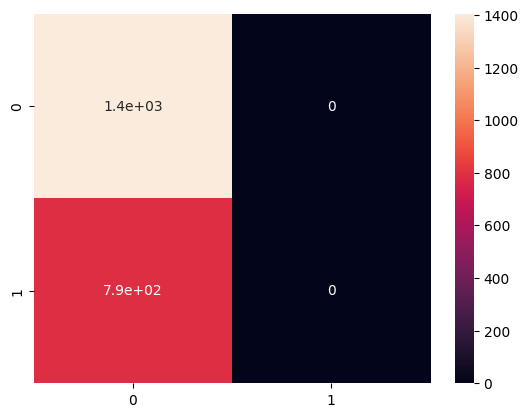

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
#always put ground truth before prediction to get conventional matrix interpretation
#top-right is false positive
cm=confusion_matrix(y_test,predictions)
print(cm)
sns.heatmap(cm, annot=True)

Top-left(1442): True Negative (TN);
Top-right(0): False Positive (FP);
Bottom-left (749): False Negatives (FN);
Bottom-right (0): True Positives (TP)

The model is heavily biased towards predicting the negative class. It's always predicting 'no heart attack risk'(749 false negatives and no true positives), in fact, the model is not predicting any case with heart attack risk

In [ ]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.641259698767686


**Decision Tree with cross-validation**

 Cross-validation divide training data into k folds and use each fold serving as validation set once. The performance metric accuracy is calculated for each iteration and averaged to get overall performance estimate. If average cross-validation score is low, need to fine_tune hyperparameters  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create a Decision Tree classifier
dtree = DecisionTreeClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(dtree, X, y, cv=5, scoring='accuracy')

# Print the average accuracy and standard deviation
print(f"Average Accuracy: {scores.mean()}")
print(f"Standard Deviation: {scores.std()}")

Average Accuracy: 0.5331502811878919
Standard Deviation: 0.011617607895192639


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test_scaled)
print(f"Test Accuracy = {accuracy_score(y_test, predictions)}")

Test Accuracy = 0.535371976266545


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[881 561]
 [457 292]]
              precision    recall  f1-score   support

           0       0.66      0.61      0.63      1442
           1       0.34      0.39      0.36       749

    accuracy                           0.54      2191
   macro avg       0.50      0.50      0.50      2191
weighted avg       0.55      0.54      0.54      2191



561 false positive, 457 false negative (459 if use unscaled data)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_pred = rfc.predict(X_test_scaled)
from sklearn import metrics
print("Training Accuracy =", format(metrics.accuracy_score(y_test, rfc_pred)))

Training Accuracy = 0.6421725239616614


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[1397    8]
 [ 776   10]]
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1405
           1       0.56      0.01      0.02       786

    accuracy                           0.64      2191
   macro avg       0.60      0.50      0.40      2191
weighted avg       0.61      0.64      0.51      2191



**XGBoost Classifier**

In [ ]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, verbosity=1, random_state=0)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
xgb_pred = xgb_model.predict(X_test_scaled)
from sklearn import metrics
print("Test Accuracy =", format(metrics.accuracy_score(y_test, xgb_pred)))

Test Accuracy = 0.5919671382930168


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[1142  263]
 [ 631  155]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.72      1405
           1       0.37      0.20      0.26       786

    accuracy                           0.59      2191
   macro avg       0.51      0.51      0.49      2191
weighted avg       0.55      0.59      0.55      2191



**XGBoost with early stopping**

In [ ]:
import sklearn

print(sklearn.__version__)

1.6.1


In [ ]:
import xgboost

print(xgboost.__version__)

2.1.3


In [ ]:
#upgrade XGBoost for early stopping
!pip install --upgrade xgboost

import xgboost  # Import XGBoost after the upgrade
print(xgboost.__version__)  # Check the version

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3
2.1.3


In [ ]:
n = int(len(X_train)*0.8) #use 80% to train and 20% to eval
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train_scaled[:n], X_train_scaled[n:], y_train[:n], y_train[n:]

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1,
                          verbosity=1,
                          early_stopping_rounds=10,
                          random_state=0) #verbosity=1 is default, showing warnings and basic training info

# Instead of passing early_stopping_rounds to fit, pass eval_set to fit, and use it with the best_ntree_limit attribute after training.
xgb_model.fit(X_train_fit, y_train_fit,
              eval_set=[(X_train_eval, y_train_eval)],
              verbose=True
              )


# Get the best number of trees
best_n_trees = xgb_model.best_iteration
print(f"Best number of trees: {best_n_trees}")

# For predictions, you can optionally specify ntree_limit:
xgb_pred = xgb_model.predict(X_test_scaled, iteration_range=(0, best_n_trees))

[0]	validation_0-logloss:0.65403
[1]	validation_0-logloss:0.65355
[2]	validation_0-logloss:0.65411
[3]	validation_0-logloss:0.65528
[4]	validation_0-logloss:0.65576
[5]	validation_0-logloss:0.65642
[6]	validation_0-logloss:0.65673
[7]	validation_0-logloss:0.65740
[8]	validation_0-logloss:0.65757
[9]	validation_0-logloss:0.65832
[10]	validation_0-logloss:0.65892
Best number of trees: 1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[1405    0]
 [ 786    0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1405
           1       0.00      0.00      0.00       786

    accuracy                           0.64      2191
   macro avg       0.32      0.50      0.39      2191
weighted avg       0.41      0.64      0.50      2191



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [ ]:
svc_pred = svc_model.predict(X_test_scaled)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, svc_pred)))

Test Accuracy = 0.641259698767686


Precision is the ratio of correctly predicted positive observations to the total predicted positives. Precision = True Positives / (True Positives + False Positives). It shows of all the data points predicted as positive, what proportion was actually positive. High precision means the model is good at avoiding false positives


Recall is the ratio of correctly predicted positive observations to all actual positives. Recall = True Positives / (True Positives + False Negatives), it shows of all the actual positive data points, what proportion did the model correctly identify. High recall means the model is good at finding all the positive cases

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[1405    0]
 [ 786    0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1405
           1       0.00      0.00      0.00       786

    accuracy                           0.64      2191
   macro avg       0.32      0.50      0.39      2191
weighted avg       0.41      0.64      0.50      2191



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For class 1 of target, precision=0.00 (0% of predicted positives are coorect), recall=0.00 (0% of actual positives was found)

For class 0 of target, precision=0.64 (64% of predicted negatives are coorect), recall=1.00 (100% of actual positives was found)

This model identifies negatives well, but no positives were identified

In [ ]:
pd.DataFrame(y_test).value_counts()

,count
0,
0,1405
1,786


0 True positive, 786 false negative, predicted all true positives to negatives, not predicting true positives right

SVM and XGBoost with 1 tree has highest accuracy score, but can't identify true positives, **Random Forrest is the best with training accuracy of 0.64**

**Using 9 models in pipeline**

In [ ]:
#downgrade scikit-learn to a version that is compatible with current version of XGBoost
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
# improt ALl models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#importing pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# create models list

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naye base Classifier', GaussianNB())
]

In [ ]:
best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),
        #('encoder', OneHotEncoder(handle_unknow='ignore'))
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()  #std<=0.02: low variance, model is stable and generalize
    # well; 0.02<std<=0.05: mod variance, model might be sensitive to data splits;
    # std>0.5: high variance, model is unstable due to small dataset or data imbalance, try stratified
    # k-fold cross-validation (StratifiedKFold) to ensure balanced class distribution or
    # getting more data or SMOTE technique for class imbalance

    #fit the pipeline on the training data
    pipeline.fit(X_train_scaled, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test_scaled)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    #print the performance metrics
    print("Model", name)
    print("Cross Validation mean accuracy: ", mean_accuracy)
    print("Cross Validation std accuracy: ", std_accuracy)
    print("Test Accuracy: ", accuracy)
    print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
    print("Classification report: \n", classification_report(y_test, y_pred))
    print()

    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model: ", best_model)

Model Logistic Regression
Cross Validation mean accuracy:  0.6419659588751728
Cross Validation std accuracy:  0.0003007518044526373
Test Accuracy:  0.641259698767686
Confusion matrix: 
 [[1405    0]
 [ 786    0]]
Classification report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1405
           1       0.00      0.00      0.00       786

    accuracy                           0.64      2191
   macro avg       0.32      0.50      0.39      2191
weighted avg       0.41      0.64      0.50      2191




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Gradient Boosting
Cross Validation mean accuracy:  0.6352711657435862
Cross Validation std accuracy:  0.0018333371015776838
Test Accuracy:  0.6394340483797353
Confusion matrix: 
 [[1379   26]
 [ 764   22]]
Classification report: 
               precision    recall  f1-score   support

           0       0.64      0.98      0.78      1405
           1       0.46      0.03      0.05       786

    accuracy                           0.64      2191
   macro avg       0.55      0.50      0.42      2191
weighted avg       0.58      0.64      0.52      2191


Model KNeighbors Classifier
Cross Validation mean accuracy:  0.5588874420542737
Cross Validation std accuracy:  0.009629730691510014
Test Accuracy:  0.5632131446827933
Confusion matrix: 
 [[1064  341]
 [ 616  170]]
Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.76      0.69      1405
           1       0.33      0.22      0.26       786

    accuracy                   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif

All models have std of cross validation accuracy score less than 0.02, which means no problem with data splits

**Decision tree has accuracy 0.54, not the best of all models, but best recall 0.41, which is more critical than accuracy**

Decision tree hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Use StratifiedKFold for balanced class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Set up GridSearchCV with recall scoring
grid_search = GridSearchCV(dt_model, param_grid, scoring='recall', cv=cv, n_jobs=-1)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Print best parameters and recall score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 30, 'min_samples_split': 2}
Best Recall Score: 0.37483760220445406


In [ ]:
# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(),
    "NB": GaussianNB(),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42,),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

*Need to revise the below function because it's not getting the best recall model*

In [ ]:
def hyperparameter_tuning(X_train, y_train, X_test, y_test, models):
    # Define dictionary to store results
    results = {}

    # Perform hyperparameter tuning for each model
    for model_name, model in models.items():
    # Define parameter grid for hyperparameter tuning
        param_grid = {}
    if model_name == 'Logistic Regression':
        param_grid = {'C': [0.1, 1, 10, 100]}
    elif model_name == 'KNN':
        param_grid = {'n_neighbors': [3, 5, 7, 9]}
    elif model_name == 'NB':
        param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
    elif model_name == 'SVM':
        param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
    elif model_name == 'Decision Tree':
        param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    elif model_name == 'Random Forest':
        param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    elif model_name == 'XGBoost':
        param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
    elif model_name == 'GradientBoosting':
        param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
    elif model_name == 'AdaBoost':
        param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}


        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')  # instead of 'accuracy'
        grid_search.fit(X_train, y_train)

        # Get best hyperparameters and evaluate on test set
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        best_recall = grid_search.best_score_
        y_pred = best_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        # Store results in dictionary
        results[model_name] = {'best_params': best_params, 'best recall': best_recall, 'accuracy': accuracy}

    return results

In [ ]:
results = hyperparameter_tuning(X_train_scaled, y_train, X_test_scaled, y_test, models)
for model_name, result in results.items():
    print("Model:", model_name)
    print("Best hyperparameters:", result['best_params'])
    print("Best recall:", result['best recall'])
    print("Accuracy:", result['accuracy'])
    print()

Model: AdaBoost
Best hyperparameters: {'learning_rate': 0.2, 'n_estimators': 200}
Best recall: 0.002549577630211862
Accuracy: 0.641259698767686



Eliminate geographic features

rerun X_train,X_test to get them in dataframe

In [ ]:
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns) #use X_train.columns b/c X_train_scaled is an Array
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
df_X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6572 entries, 0 to 6571
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              6572 non-null   float64
 1   Sex                              6572 non-null   float64
 2   Cholesterol                      6572 non-null   float64
 3   Heart Rate                       6572 non-null   float64
 4   Diabetes                         6572 non-null   float64
 5   Family History                   6572 non-null   float64
 6   Smoking                          6572 non-null   float64
 7   Obesity                          6572 non-null   float64
 8   Alcohol Consumption              6572 non-null   float64
 9   Exercise Hours Per Week          6572 non-null   float64
 10  Previous Heart Problems          6572 non-null   float64
 11  Medication Use                   6572 non-null   float64
 12  Stress Level        

In [ ]:
X_train_scaled1 = df_X_train_scaled.drop(columns=['Country','Hemisphere','Continent_1','Continent_2','Continent_3','Continent_4','Continent_5' ])
X_test_scaled1 = df_X_test_scaled.drop(columns=['Country','Hemisphere','Continent_1','Continent_2','Continent_3','Continent_4','Continent_5'])

In [ ]:
# improt ALl models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#importing pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# create models list
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naye base Classifier', GaussianNB())
]

In [ ]:
best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),
        #('encoder', OneHotEncoder(handle_unknow='ignore'))
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train_scaled1, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()  #std<=0.02: low variance, model is stable and generalize
    # well; 0.02<std<=0.05: mod variance, model might be sensitive to data splits;
    # std>0.5: high variance, model is unstable due to small dataset or data imbalance, try stratified
    # k-fold cross-validation (StratifiedKFold) to ensure balanced class distribution or
    # getting more data or SMOTE technique for class imbalance

    #fit the pipeline on the training data
    pipeline.fit(X_train_scaled1, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test_scaled1)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    #print the performance metrics
    print("Model", name)
    print("Cross Validation mean accuracy: ", mean_accuracy)
    print("Cross Validation std accuracy: ", std_accuracy)
    print("Test Accuracy: ", accuracy)
    print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
    print("Classification report: \n", classification_report(y_test, y_pred))
    print()

    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model: ", best_model)

Model Logistic Regression
Cross Validation mean accuracy:  0.6419659588751728
Cross Validation std accuracy:  0.0003007518044526373
Test Accuracy:  0.641259698767686
Confusion matrix: 
 [[1405    0]
 [ 786    0]]
Classification report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1405
           1       0.00      0.00      0.00       786

    accuracy                           0.64      2191
   macro avg       0.32      0.50      0.39      2191
weighted avg       0.41      0.64      0.50      2191




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Gradient Boosting
Cross Validation mean accuracy:  0.6354231412515698
Cross Validation std accuracy:  0.003039655368592199
Test Accuracy:  0.639890460976723
Confusion matrix: 
 [[1381   24]
 [ 765   21]]
Classification report: 
               precision    recall  f1-score   support

           0       0.64      0.98      0.78      1405
           1       0.47      0.03      0.05       786

    accuracy                           0.64      2191
   macro avg       0.56      0.50      0.41      2191
weighted avg       0.58      0.64      0.52      2191


Model KNeighbors Classifier
Cross Validation mean accuracy:  0.5654281762360308
Cross Validation std accuracy:  0.007574871566965803
Test Accuracy:  0.5705157462345961
Confusion matrix: 
 [[1064  341]
 [ 600  186]]
Classification report: 
               precision    recall  f1-score   support

           0       0.64      0.76      0.69      1405
           1       0.35      0.24      0.28       786

    accuracy                     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif

Best model is Decision Tree with recall of 0.4, not getting better after dropping the 3 geographic features

**Identify and remove less important features using RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
import numpy as np

# Get feature importances
importances = rf.feature_importances_

# Sort indices based on importance (descending order)
sorted_indices = np.argsort(importances)[::-1]

# Print feature importances
for i in sorted_indices:
    print(f"Feature {i}: Importance {importances[i]}")


Feature 15: Importance 0.07512149204121482
Feature 9: Importance 0.074574893787577
Feature 13: Importance 0.07414002824034505
Feature 16: Importance 0.07345892417140117
Feature 14: Importance 0.0729784829977954
Feature 2: Importance 0.0718322029605791
Feature 21: Importance 0.0670246103964277
Feature 0: Importance 0.06477600446122277
Feature 3: Importance 0.06328402499464332
Feature 22: Importance 0.06188733675765279
Feature 19: Importance 0.04461486956813289
Feature 12: Importance 0.041130641949304825
Feature 17: Importance 0.03661274984692332
Feature 18: Importance 0.033597648798541165
Feature 8: Importance 0.011591779025902504
Feature 5: Importance 0.011359484939434427
Feature 11: Importance 0.011249642339411161
Feature 10: Importance 0.011003782675680739
Feature 4: Importance 0.010735953853708975
Feature 23: Importance 0.010484802353641466
Feature 7: Importance 0.010182741345471214
Feature 24: Importance 0.010083529290381064
Feature 1: Importance 0.00944298311346017
Feature 20: Imp

In [ ]:
importances

array([0.064776  , 0.00944298, 0.0718322 , 0.06328402, 0.01073595,
       0.01135948, 0.00497529, 0.01018274, 0.01159178, 0.07457489,
       0.01100378, 0.01124964, 0.04113064, 0.07414003, 0.07297848,
       0.07512149, 0.07345892, 0.03661275, 0.03359765, 0.04461487,
       0.00910264, 0.06702461, 0.06188734, 0.0104848 , 0.01008353,
       0.00885599, 0.00538015, 0.00846308, 0.00597276, 0.00608148])

In [ ]:
sorted_indices

array([15,  9, 13, 16, 14,  2, 21,  0,  3, 22, 19, 12, 17, 18,  8,  5, 11,
       10,  4, 23,  7, 24,  1, 20, 25, 27, 29, 28, 26,  6])

In [ ]:
# Define importance threshold
threshold = 0.01  # Adjust based on analysis

# Get indices of important features
important_indices = [i for i, imp in enumerate(importances) if imp > threshold]

# Reduce dataset to only important features
X_train_reduced = X_train_scaled[:, important_indices]
X_test_reduced = X_test_scaled[:, important_indices]  # If you have test data

print(f"Reduced feature set shape: {X_train_reduced.shape}")

Reduced feature set shape: (6572, 22)


8 features removed

In [ ]:
X_train.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Hemisphere', 'Systolic', 'Diastolic', 'Diet_1', 'Diet_2',
       'Continent_1', 'Continent_2', 'Continent_3', 'Continent_4',
       'Continent_5'],
      dtype='object')

In [ ]:
import pandas as pd

# Get original feature names
feature_names = np.array(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Hemisphere', 'Systolic', 'Diastolic', 'Diet_1', 'Diet_2',
       'Continent_1', 'Continent_2', 'Continent_3', 'Continent_4',
       'Continent_5'])

# Keep only important features
important_features = feature_names[important_indices]

# Convert to DataFrame
X_train_reduced_df = pd.DataFrame(X_train_reduced, columns=important_features)
X_test_reduced_df = pd.DataFrame(X_test_reduced, columns=important_features)
X_train_reduced_df.columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Systolic', 'Diastolic', 'Diet_1', 'Diet_2'],
      dtype='object')

Lower threshold to capture more people at risk

In [ ]:
# create models list
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),
    #('Support Vector Machine', SVC(random_state=42)),
    ('Naye base Classifier', GaussianNB())
]

In [ ]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [ ]:
#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train_reduced_df, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()

    #fit the pipeline on the training data
    pipeline.fit(X_train_reduced_df, y_train)

    # use .predict_proba() instead of .predict() to get predicted probabilities instead of class labels
    y_pred_proba = pipeline.predict_proba(X_test_reduced_df)[:, 1]  # Probability of class 1

    # Lower the decision threshold (default is 0.5, try 3 different thresholds)
    thresholds = np.arange(0.35, 0.45, 0.05)

    for t in thresholds:
        y_pred_t = (y_pred_proba >= t).astype(int)
        precision_t = precision_score(y_test, y_pred_t)
        recall_t = recall_score(y_test, y_pred_t)
        accuracy = accuracy_score(y_test, y_pred_t)
        print("Model", name)
        print(f"Threshold: {t:.2f}, Precision: {precision_t:.3f}, Recall: {recall_t:.3f}, Accuracy: {accuracy:.3f}")

Model Logistic Regression
Threshold: 0.35, Precision: 0.360, Recall: 0.613, Accuracy: 0.471
Model Logistic Regression
Threshold: 0.40, Precision: 0.398, Recall: 0.047, Accuracy: 0.633
Model Logistic Regression
Threshold: 0.45, Precision: 0.000, Recall: 0.000, Accuracy: 0.641


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Gradient Boosting
Threshold: 0.35, Precision: 0.372, Recall: 0.573, Accuracy: 0.500
Model Gradient Boosting
Threshold: 0.40, Precision: 0.416, Recall: 0.219, Accuracy: 0.610
Model Gradient Boosting
Threshold: 0.45, Precision: 0.421, Recall: 0.057, Accuracy: 0.634
Model KNeighbors Classifier
Threshold: 0.35, Precision: 0.355, Recall: 0.570, Accuracy: 0.474
Model KNeighbors Classifier
Threshold: 0.40, Precision: 0.355, Recall: 0.570, Accuracy: 0.474
Model KNeighbors Classifier
Threshold: 0.45, Precision: 0.352, Recall: 0.229, Accuracy: 0.572
Model Decision Tree Classifier
Threshold: 0.35, Precision: 0.375, Recall: 0.415, Accuracy: 0.542
Model Decision Tree Classifier
Threshold: 0.40, Precision: 0.375, Recall: 0.415, Accuracy: 0.542
Model Decision Tree Classifier
Threshold: 0.45, Precision: 0.375, Recall: 0.415, Accuracy: 0.542
Model AdaBoost Classifier
Threshold: 0.35, Precision: 0.359, Recall: 0.999, Accuracy: 0.359
Model AdaBoost Classifier
Threshold: 0.40, Precision: 0.359, Reca

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost Classifier has the highest recall 0.999 when shreshold is 0.35 or 0.4 or 0.45, and a good precision 0.359 (less false negative, more false positive)

**In the case of predicting risk of heart attack, high recall means more patients at risk are identified, fewer patients who need intervention being missed, which is critical because missing patients at risk without timely intervention can result in fatal consequences**

**The trade-off with precision: low precision means labeling more healthy individuals at risk, which can lead to uncessary treatments and tests. So high recall is the primary goal, with acceptable levels of precision. This would ensure most at-risk patients are identified.**